In [1]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic

# Introduction
Please check out [README.md](README.md) as it explains my approach

## Simple Test Problem

In [2]:
CITIES = [
    "Rome",
    "Milan",
    "Naples",
    "Turin",
    "Palermo",
    "Genoa",
    "Bologna",
    "Florence",
    "Bari",
    "Catania",
    "Venice",
    "Verona",
    "Messina",
    "Padua",
    "Trieste",
    "Taranto",
    "Brescia",
    "Prato",
    "Parma",
    "Modena",
]
test_problem = np.load('test_problems/test_problem.npy')
test_problem.shape

(20, 20)

In [3]:
from hc_solver import TSPHCSolver
from es_solver import TSPESSolver

In [4]:
hc_solver = TSPHCSolver(test_problem)
es_solver = TSPESSolver(test_problem, greedy_initial_solutions=True, population_size=50, offspring_size=30)

hc_best_sol, hc_history, hc_best_history = hc_solver.hc_solve(max_iter=10000)
es_best_sol, es_history, es_best_history = es_solver.es_solve(max_iter=1000)



ic| hc_best_sol: Solution(sequence=array([17, 19,  6, 14, 10, 13, 11, 18, 16,  1,  3,  5,  0,  2,  8, 15, 12,
                         9,  4,  7]),
                          fitness=np.float64(3176.71))
ic| es_best_sol: Solution(sequence=array([15, 12,  9,  4,  2,  0,  7, 17,  6, 19, 18, 16,  3,  5,  1, 11, 13,
                        10, 14,  8]),
                          fitness=2985.3199999999997)


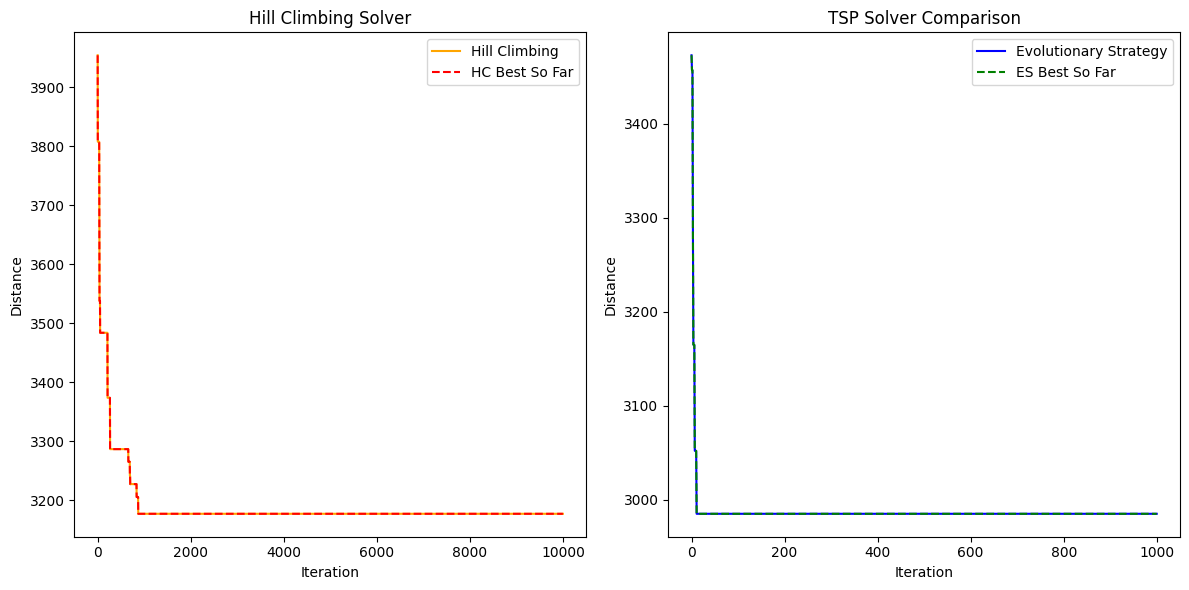

In [5]:
ic(hc_best_sol)
ic(es_best_sol)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(hc_history, label='Hill Climbing', color='orange')
ax[1].plot(es_history, label='Evolutionary Strategy', color='blue')
ax[0].plot(hc_best_history, label='HC Best So Far', color='red', linestyle='--')
ax[1].plot(es_best_history, label='ES Best So Far', color='green', linestyle='--')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Distance')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Distance')
ax[0].set_title('Hill Climbing Solver')
ax[1].set_title('Evolutionary Strategy Solver')
ax[0].legend()
ax[1].legend()
plt.title('TSP Solver Comparison')
plt.tight_layout()
plt.show()

We can see the potential of population approach becuase it has the possibility to explore more than an hill climbing solution.

I expect this difference in performance to be even more noticeable in much more difficult problems.

Both instances are initialized with greedy solutions:
- They do not guarantee the best solution but it is reasonable to think that the optimal solution can be found in the neighborhood of a quasi-optimal one

## Real problem testing

In [6]:
problem = np.load('test_problems/problem_g_50.npy')

In [7]:
np.random.seed(42)
solver = TSPHCSolver(problem)
hc_best_sol, hc_history, hc_best_history = solver.hc_solve(max_iter=50000)

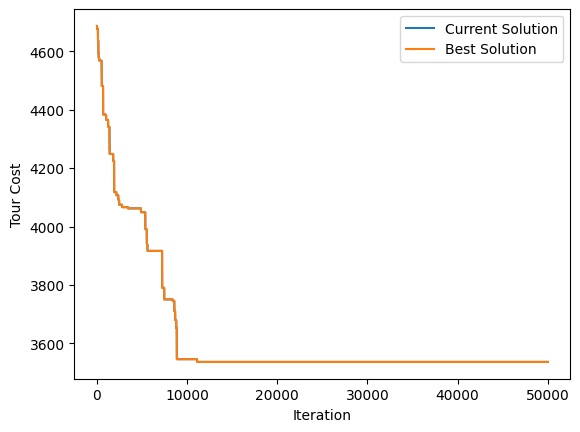

ic| hc_best_sol.fitness: np.float64(3536.3546530818085)


np.float64(3536.3546530818085)

In [8]:
plt.plot(hc_history, label='Current Solution')
plt.plot(hc_best_history, label='Best Solution')
plt.xlabel('Iteration')
plt.ylabel('Tour Cost')
plt.legend()
plt.show()
ic(hc_best_sol.fitness)

ic| hc_best_sol.fitness: 4183.427811492184


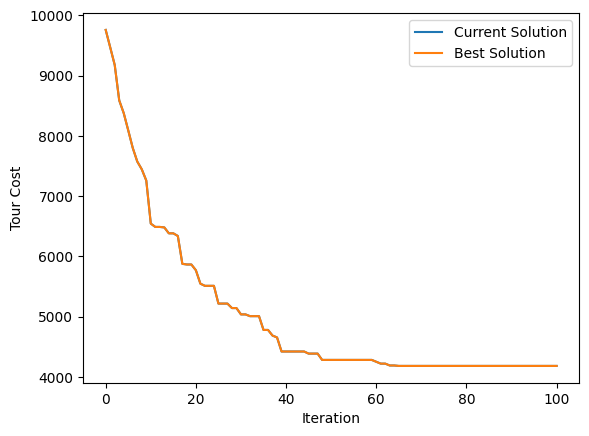

In [9]:
np.random.seed(42)

solver = TSPESSolver(problem, greedy_initial_solutions=False)
hc_best_sol, hc_best_history, hc_history = solver.es_solve(max_iter=100)
ic(hc_best_sol.fitness)

plt.plot(hc_history, label='Current Solution')
plt.plot(hc_best_history, label='Best Solution')
plt.xlabel('Iteration')
plt.ylabel('Tour Cost')
plt.legend()
plt.show()



# Test benchmarks

### Benchmarking

It is not necessary to run this cell as the results are already provided in `test_problems/results`

It takes about 35 mins to run

In [10]:
from test_solvers import execute_test_problems, default_combinations, easy_combinations

parameter_combinations = default_combinations()
execute_test_problems(folder='test_problems', es_param_combinations=parameter_combinations)

## Generation of problems for retrieval
Retrieval of the problem names to later access solution information

In [5]:
import numpy as np
from test_solvers import get_results

results = get_results('test_problems', 'problem_r2_1000')

In [3]:
import os

problem_names = []
for problem_name in os.listdir('test_problems'):
    if not problem_name.startswith('problem') or not problem_name.endswith('.npy'):
        continue
    parts = problem_name.split('_')
    name = parts[1] + '_' + parts[2].split('.')[0]
    problem_names.append(name)

# Plots for each problem type

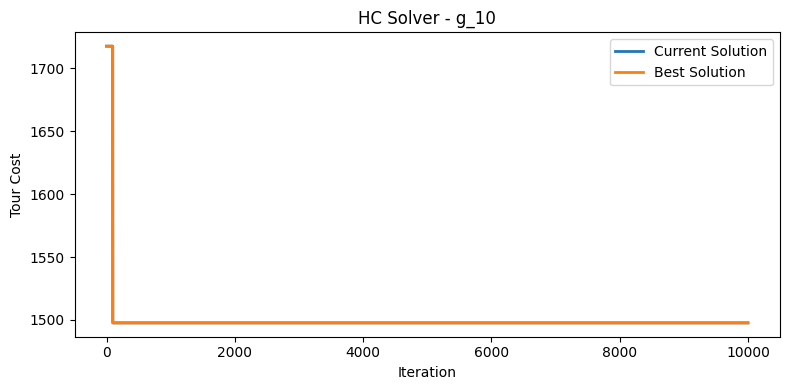

Best ES Fitness: 1497.6636482252907
Best ES Parameters: {'greedy_initial': True, 'population': 50, 'offspring': 25, 'mutation': 0.01}


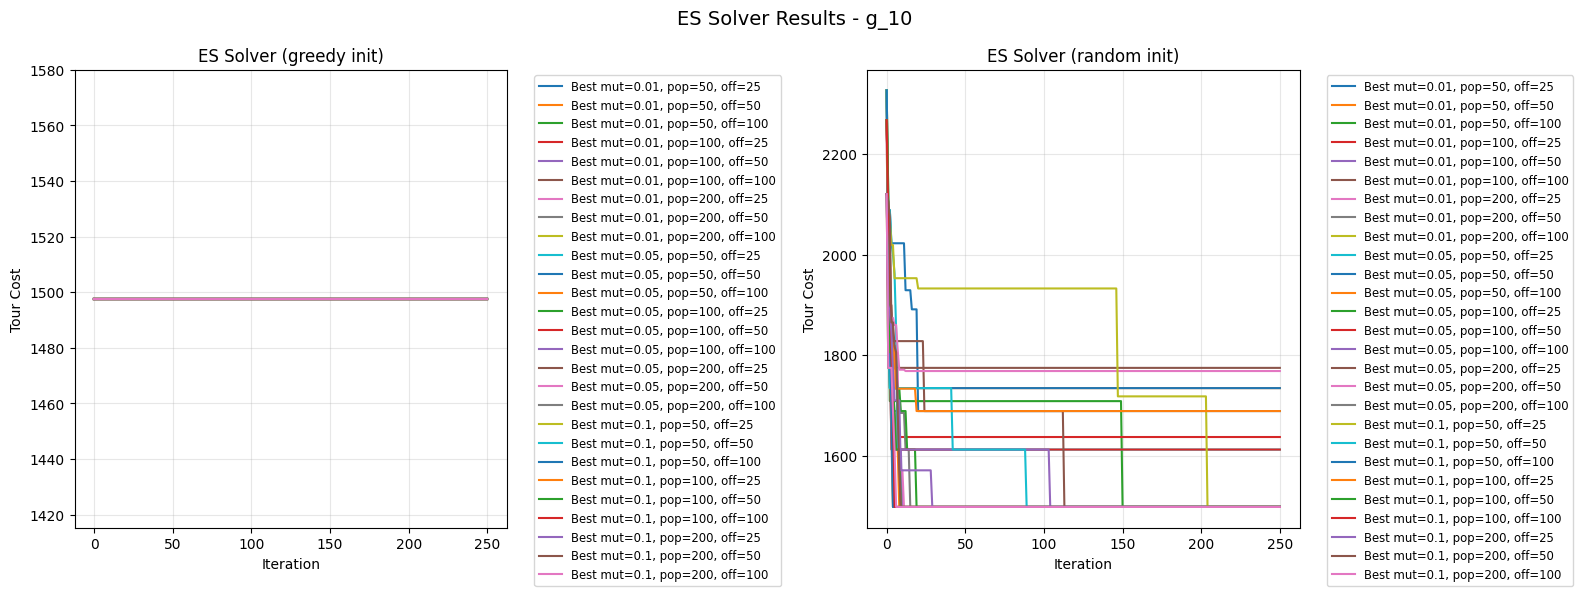

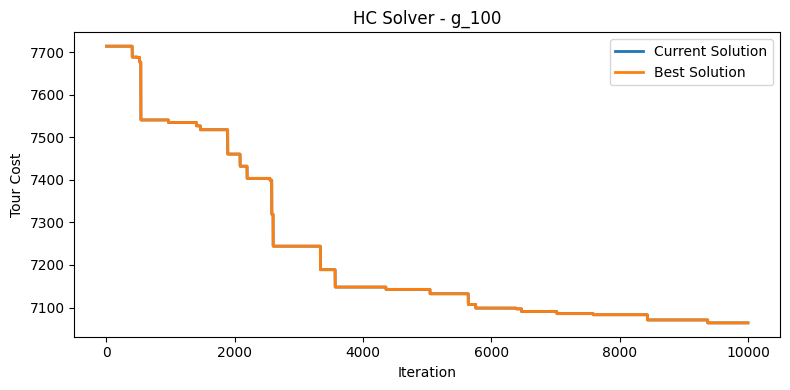

Best ES Fitness: 4458.08213307093
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 100, 'mutation': 0.1}


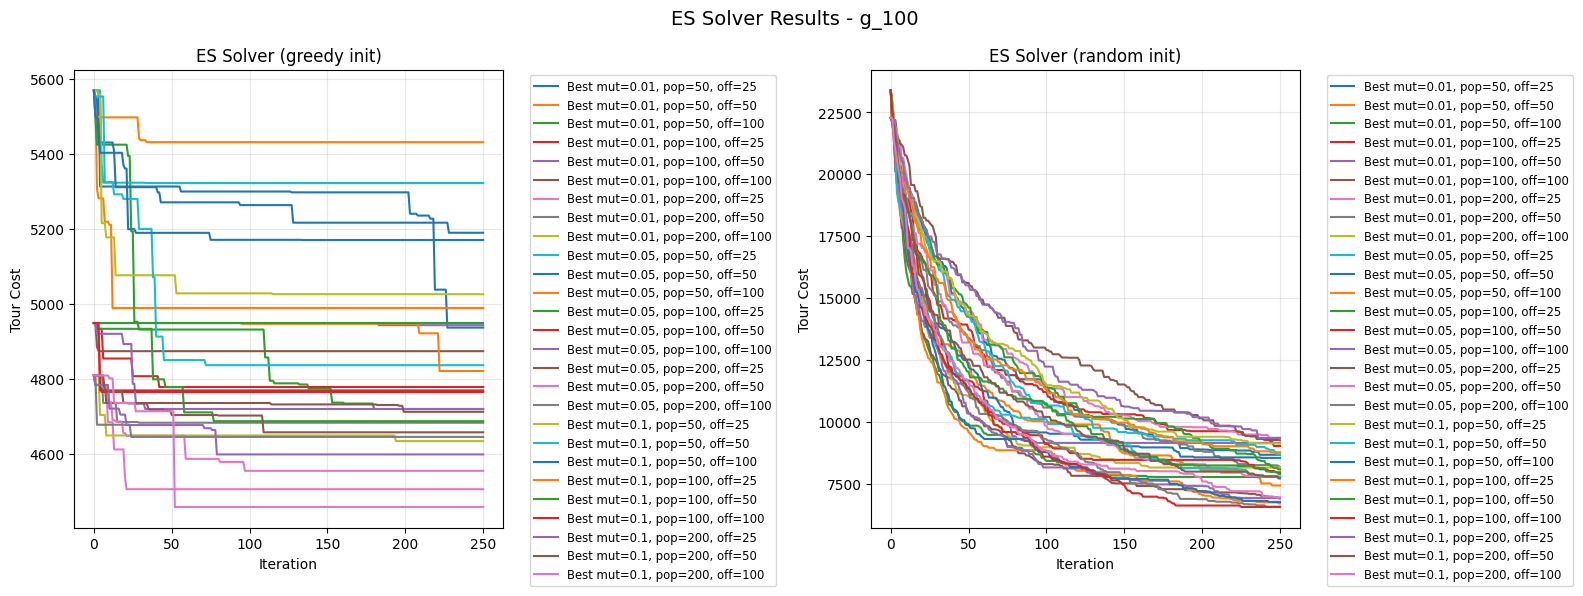

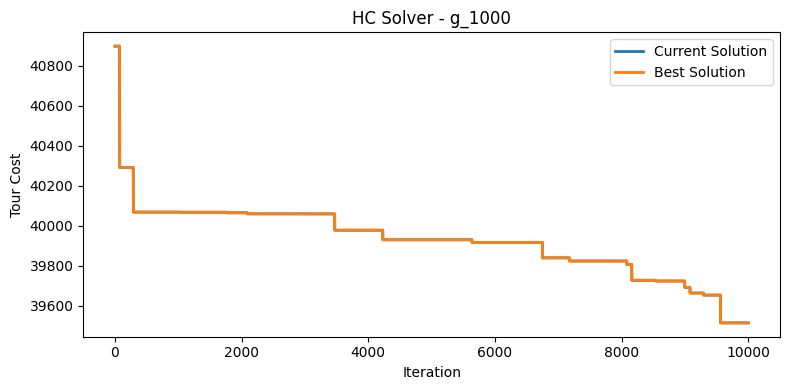

Best ES Fitness: 15481.706182544294
Best ES Parameters: {'greedy_initial': True, 'population': 100, 'offspring': 100, 'mutation': 0.05}


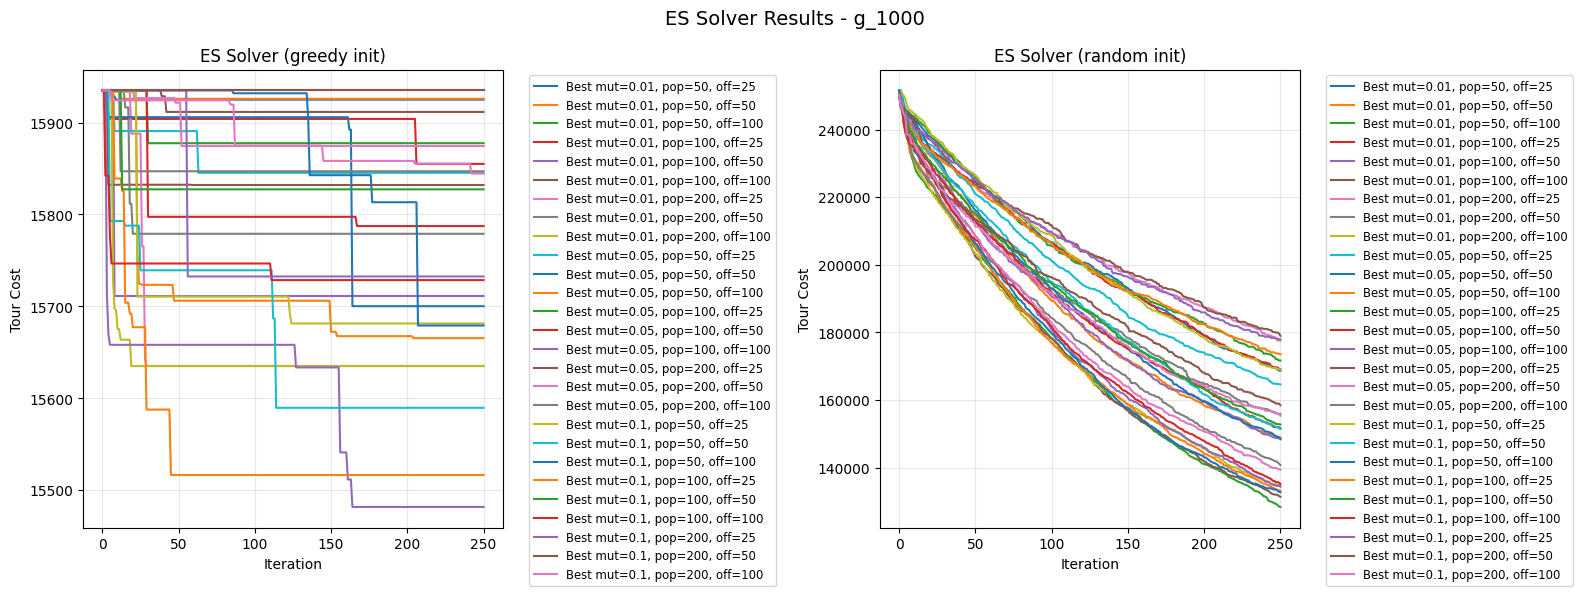

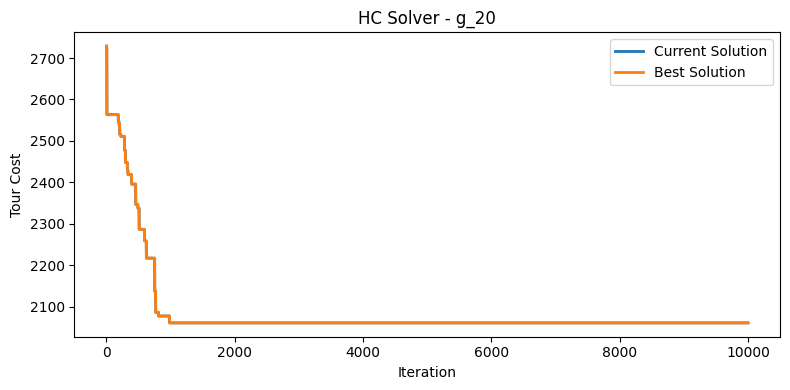

Best ES Fitness: 1755.5146770830047
Best ES Parameters: {'greedy_initial': True, 'population': 100, 'offspring': 100, 'mutation': 0.01}


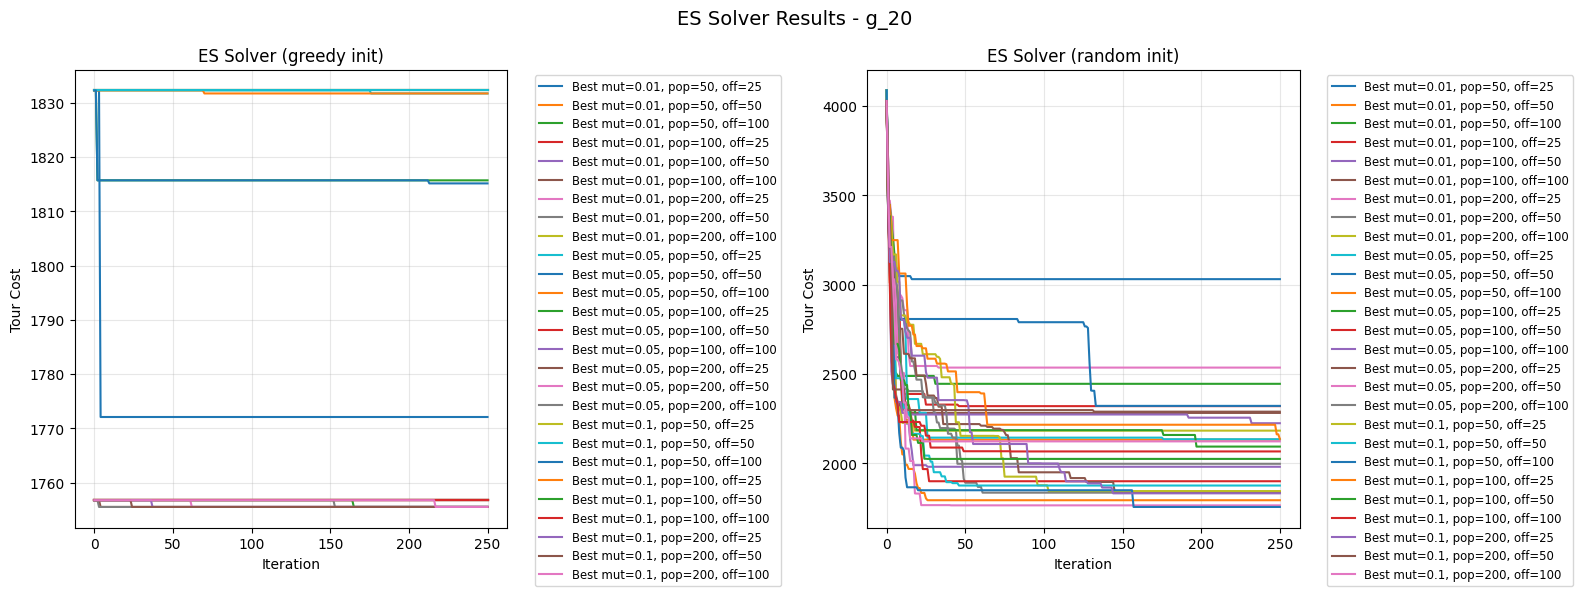

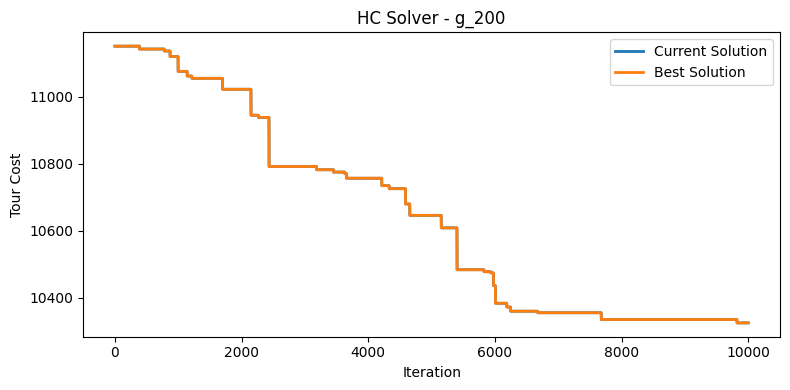

Best ES Fitness: 6791.096485043017
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 100, 'mutation': 0.01}


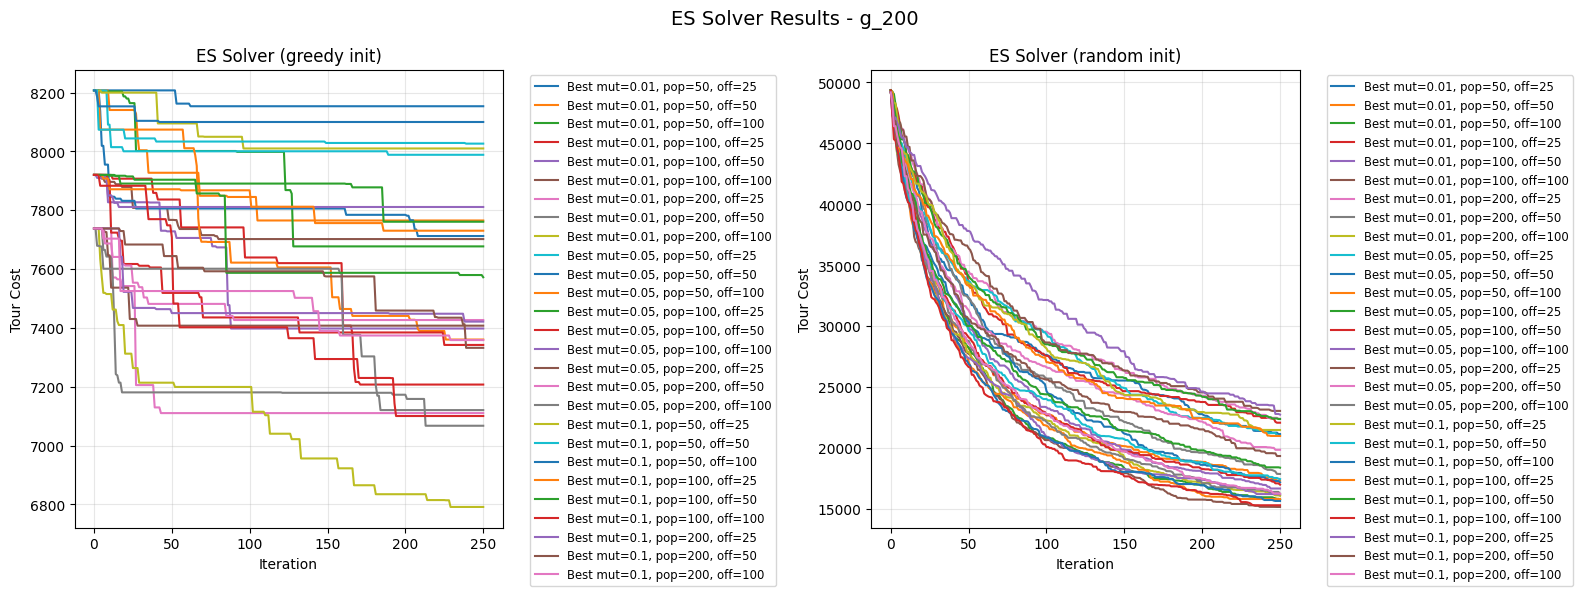

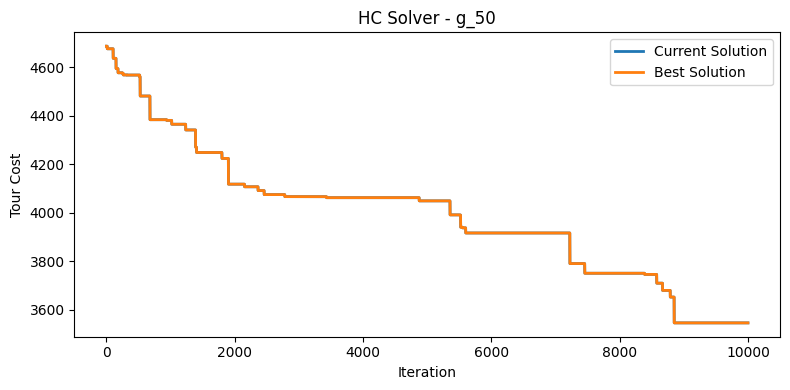

Best ES Fitness: 2854.07609627858
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 25, 'mutation': 0.1}


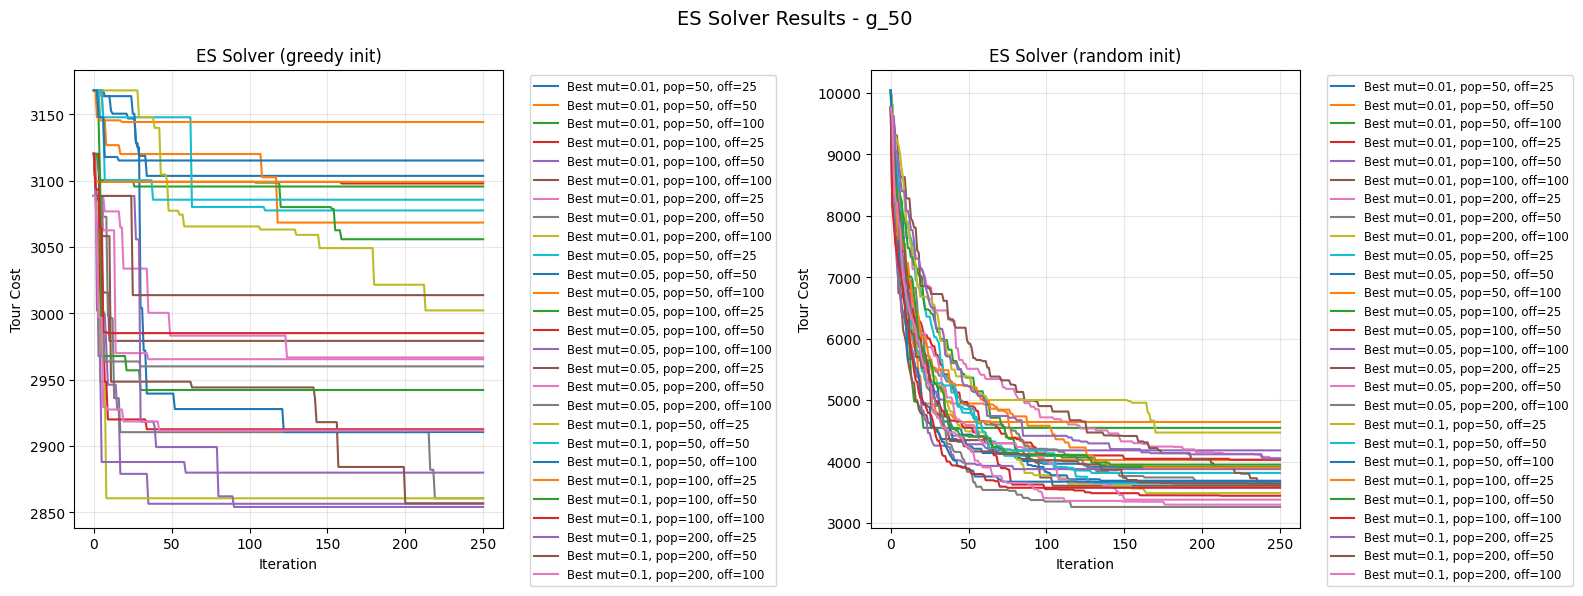

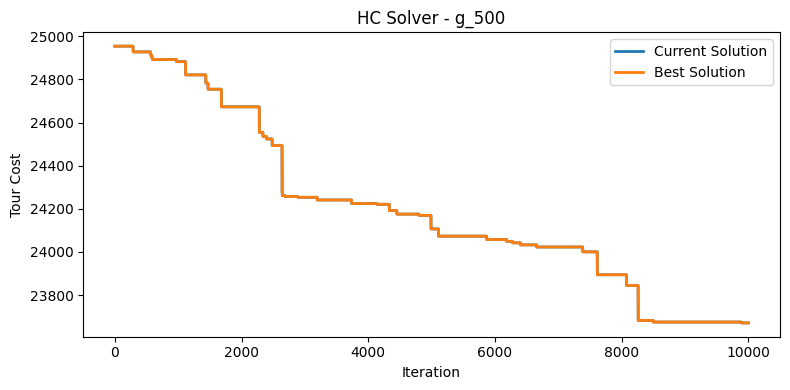

Best ES Fitness: 10459.518216046457
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 100, 'mutation': 0.01}


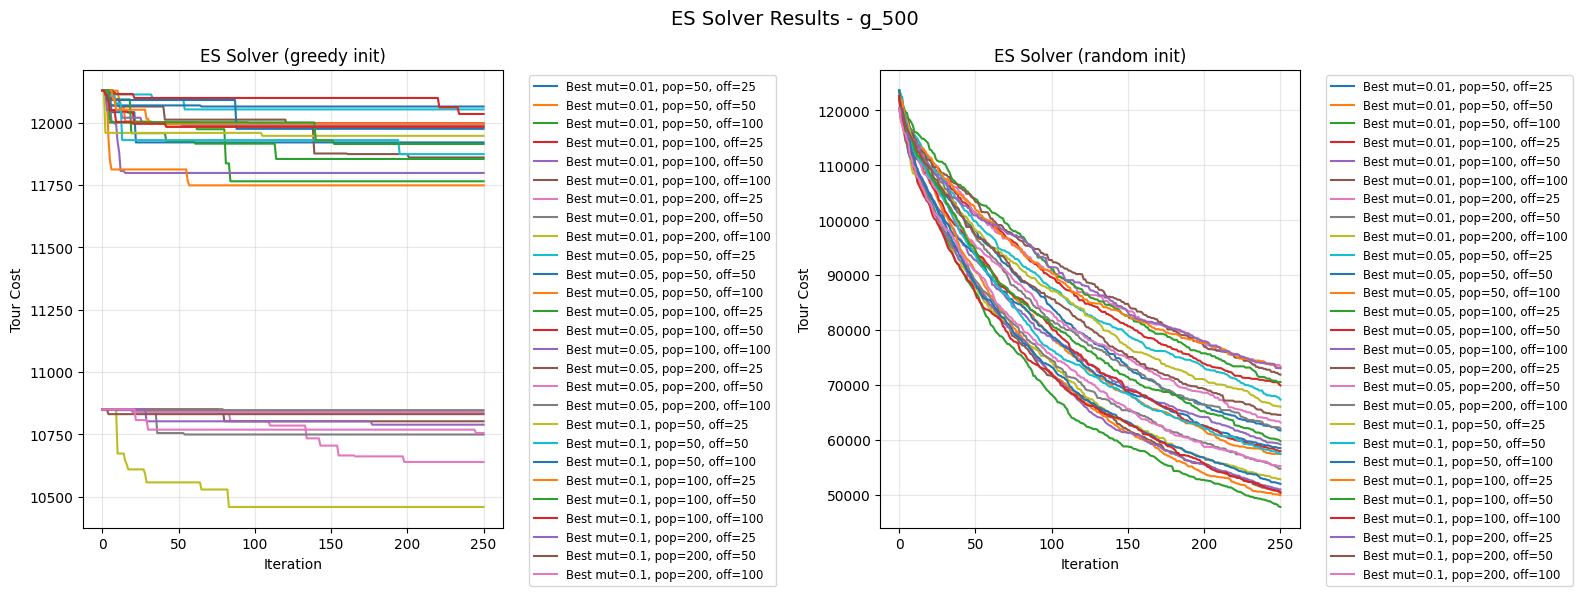

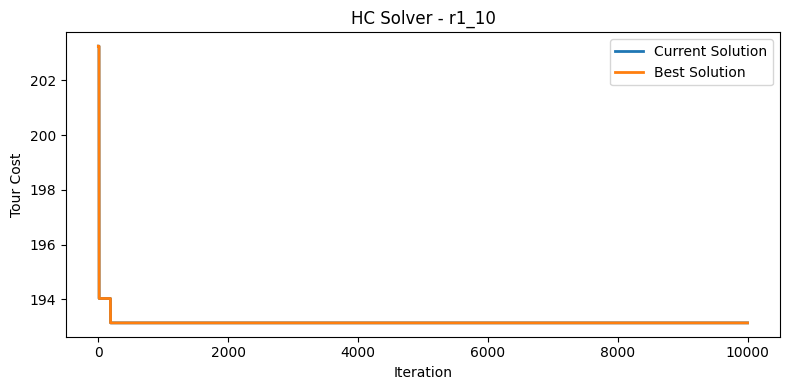

Best ES Fitness: 184.27344079993895
Best ES Parameters: {'greedy_initial': False, 'population': 100, 'offspring': 100, 'mutation': 0.01}


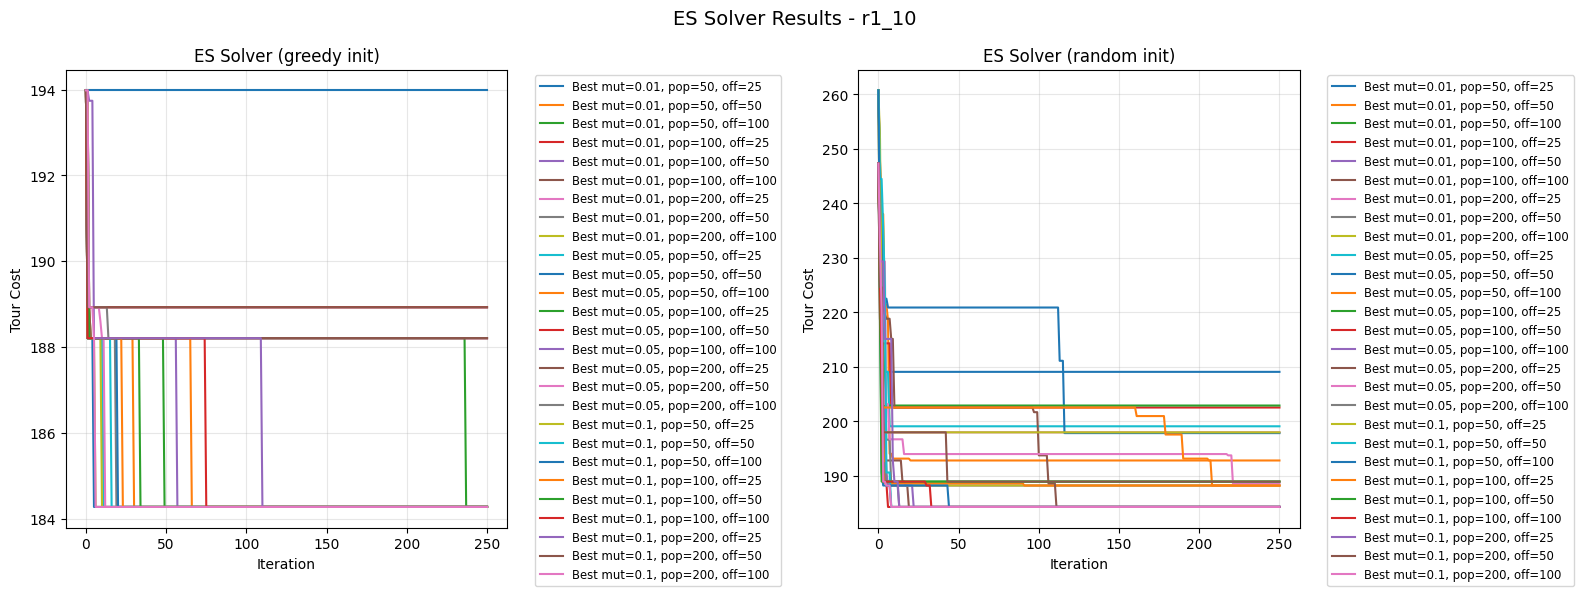

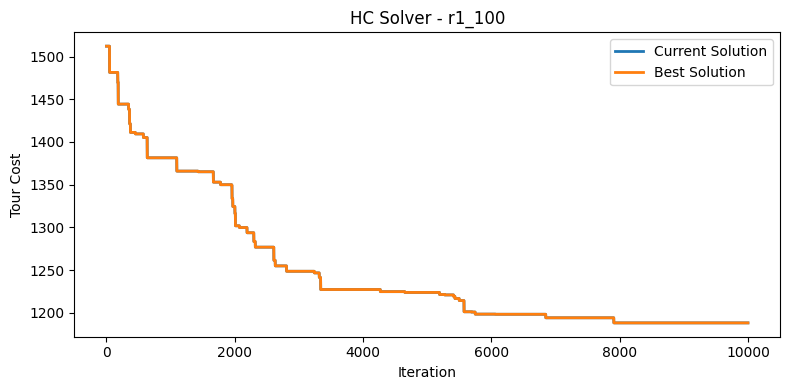

Best ES Fitness: 776.2002366499747
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 100, 'mutation': 0.1}


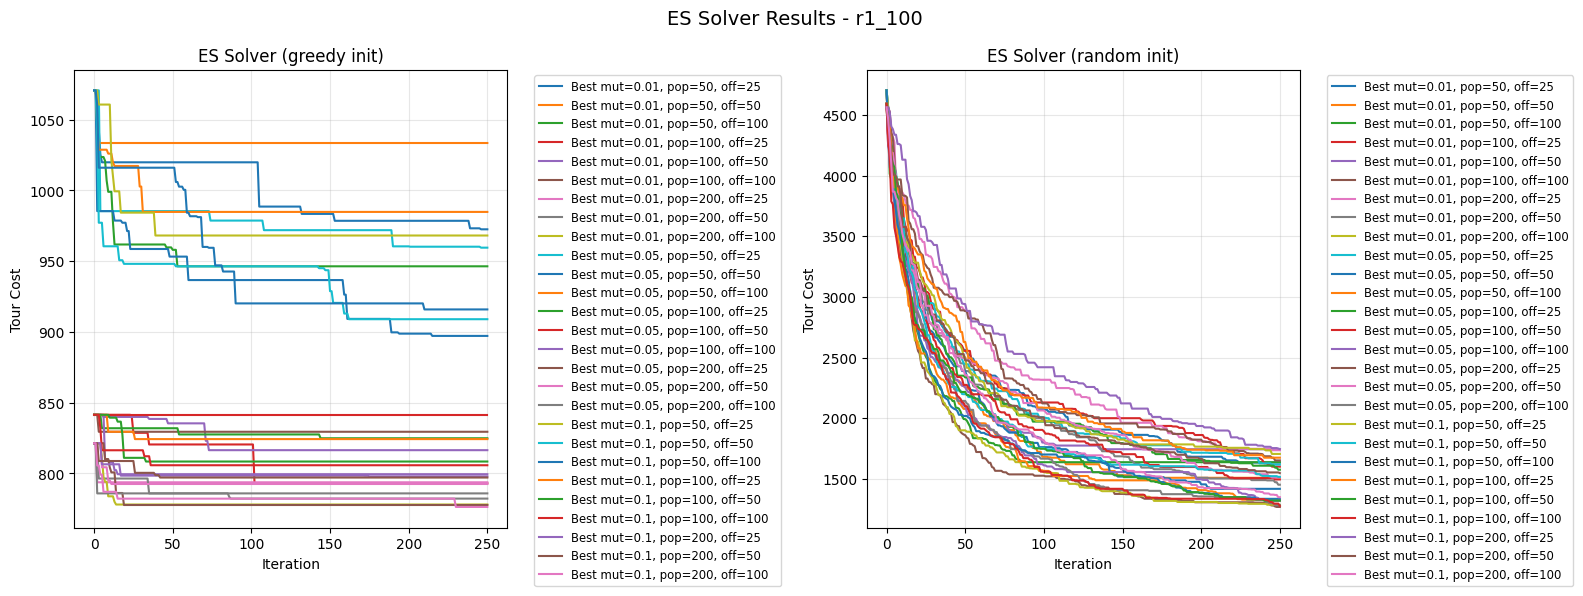

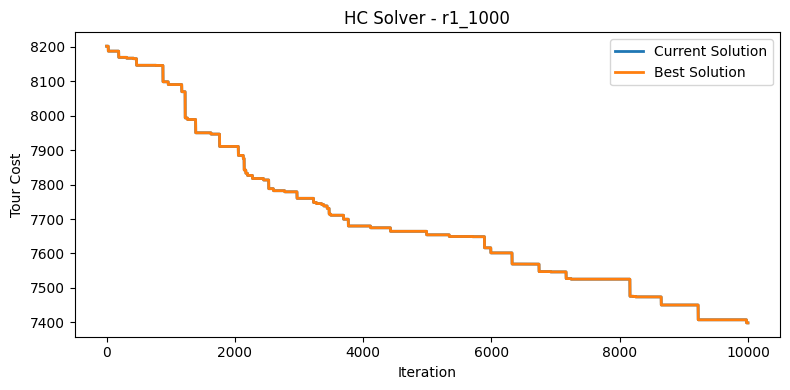

Best ES Fitness: 2772.0944330327957
Best ES Parameters: {'greedy_initial': True, 'population': 50, 'offspring': 100, 'mutation': 0.01}


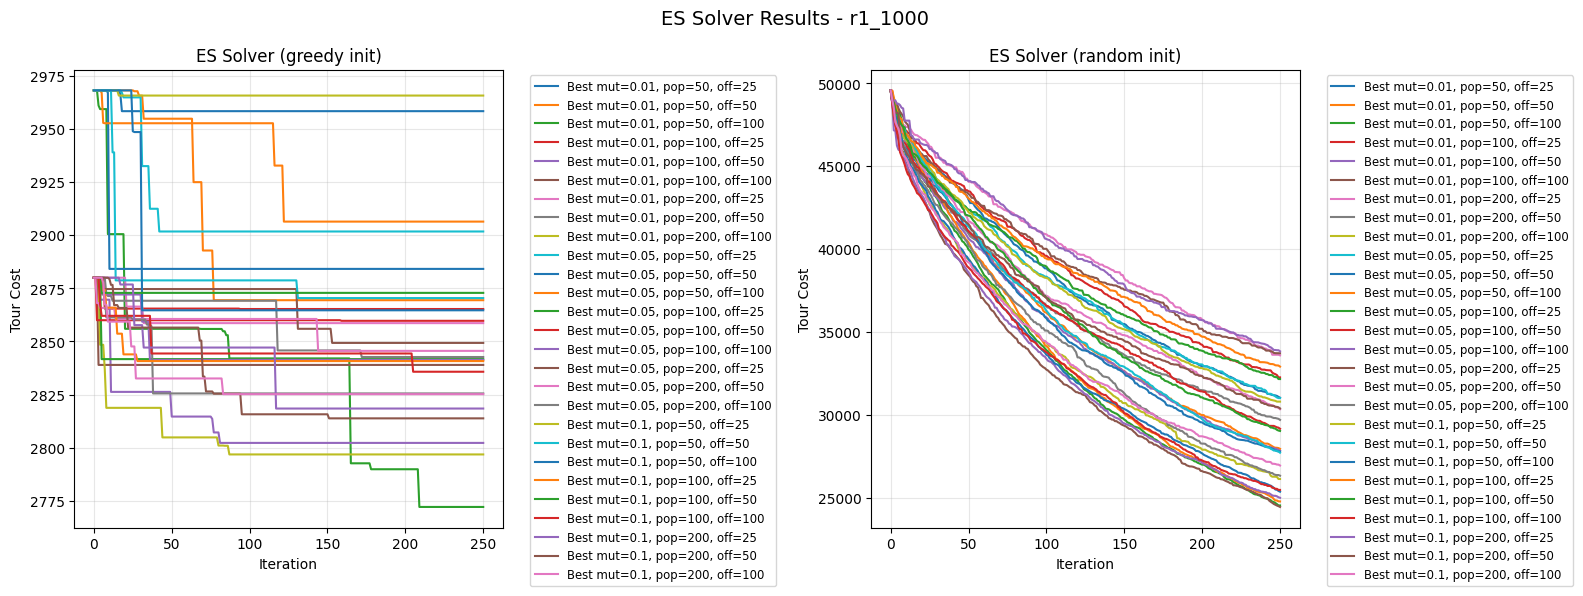

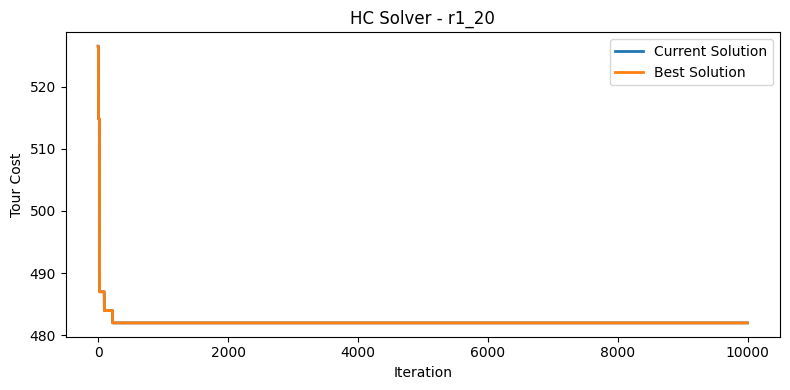

Best ES Fitness: 343.89504210405613
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 50, 'mutation': 0.05}


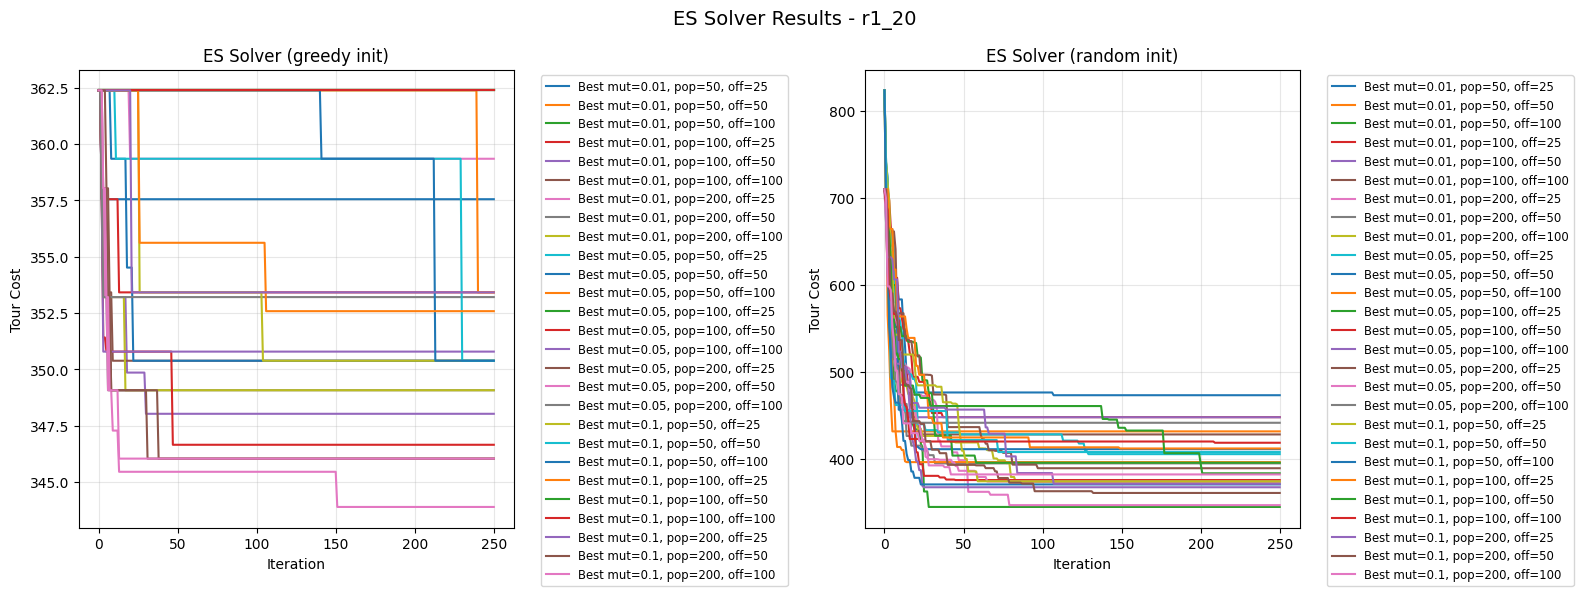

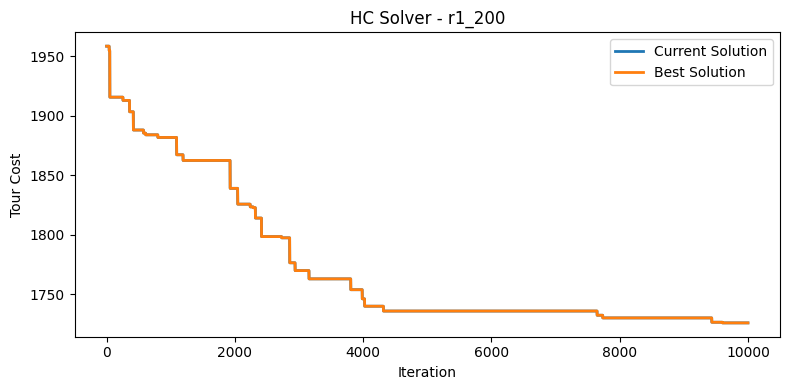

Best ES Fitness: 1223.7451846674662
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 50, 'mutation': 0.1}


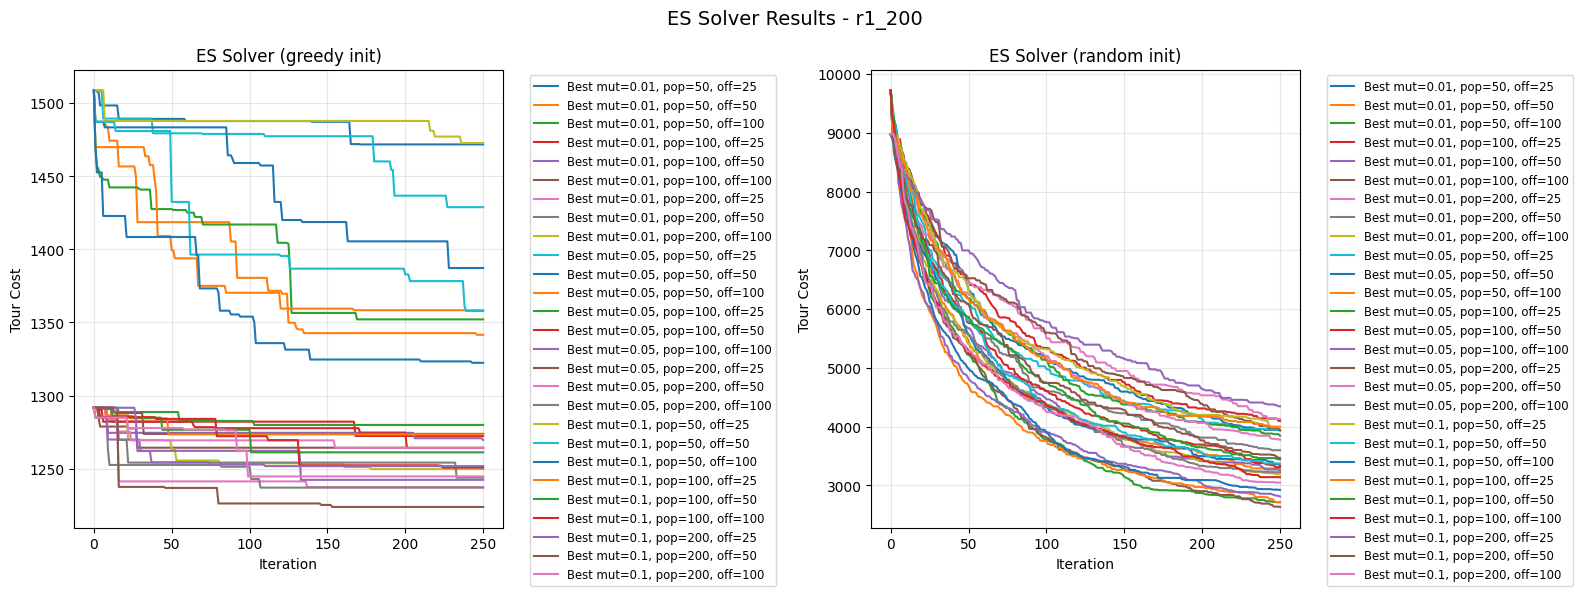

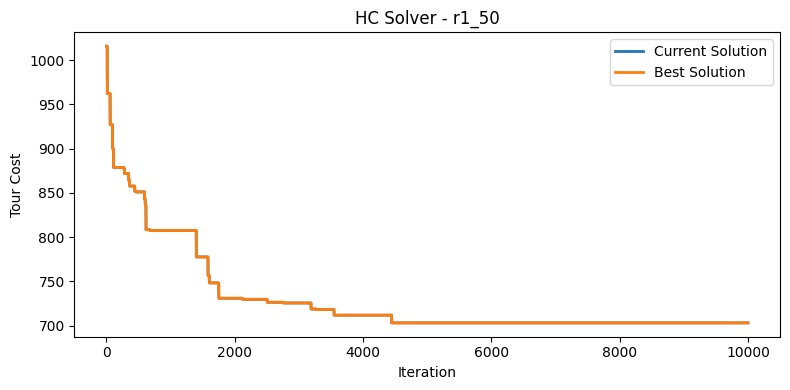

Best ES Fitness: 588.3529516509842
Best ES Parameters: {'greedy_initial': True, 'population': 100, 'offspring': 50, 'mutation': 0.01}


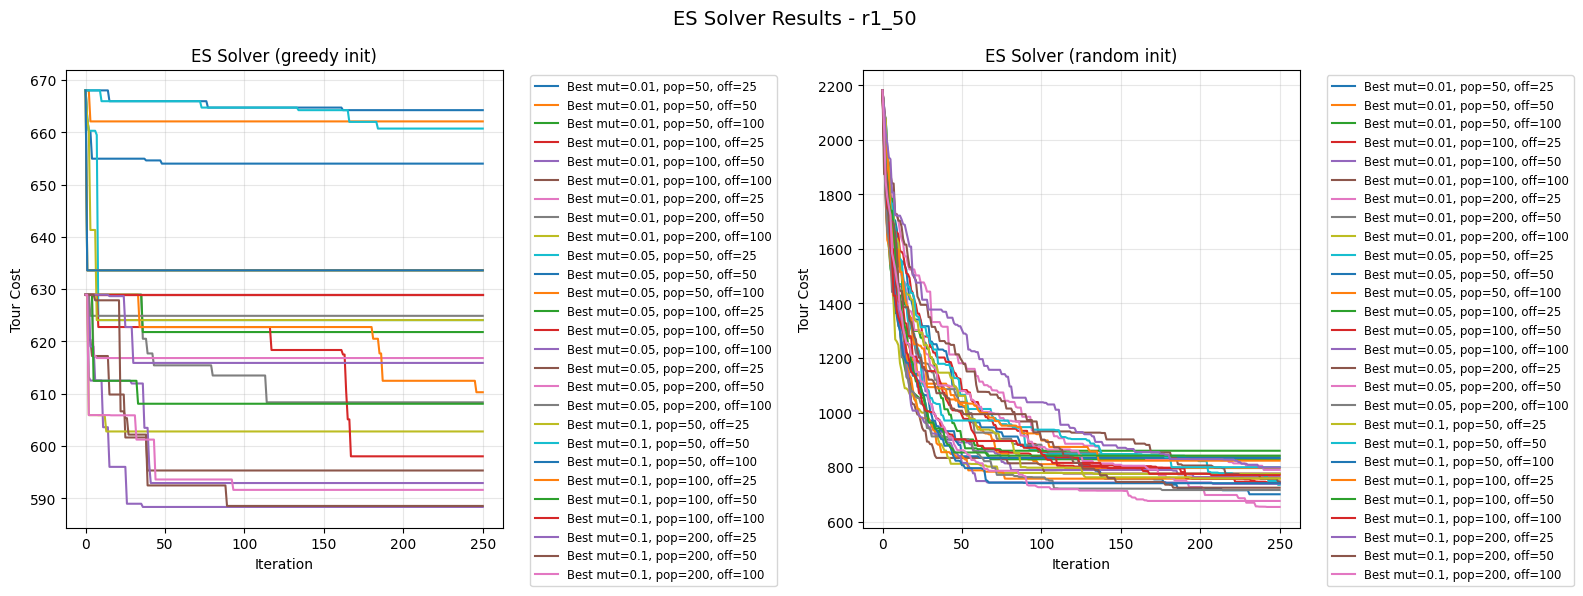

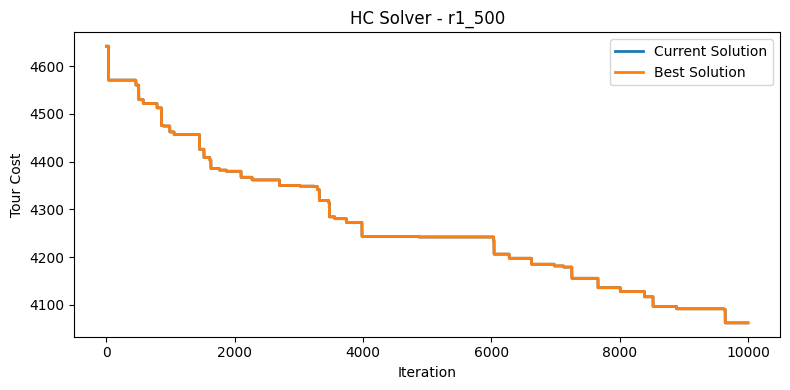

Best ES Fitness: 1885.2507913909667
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 50, 'mutation': 0.01}


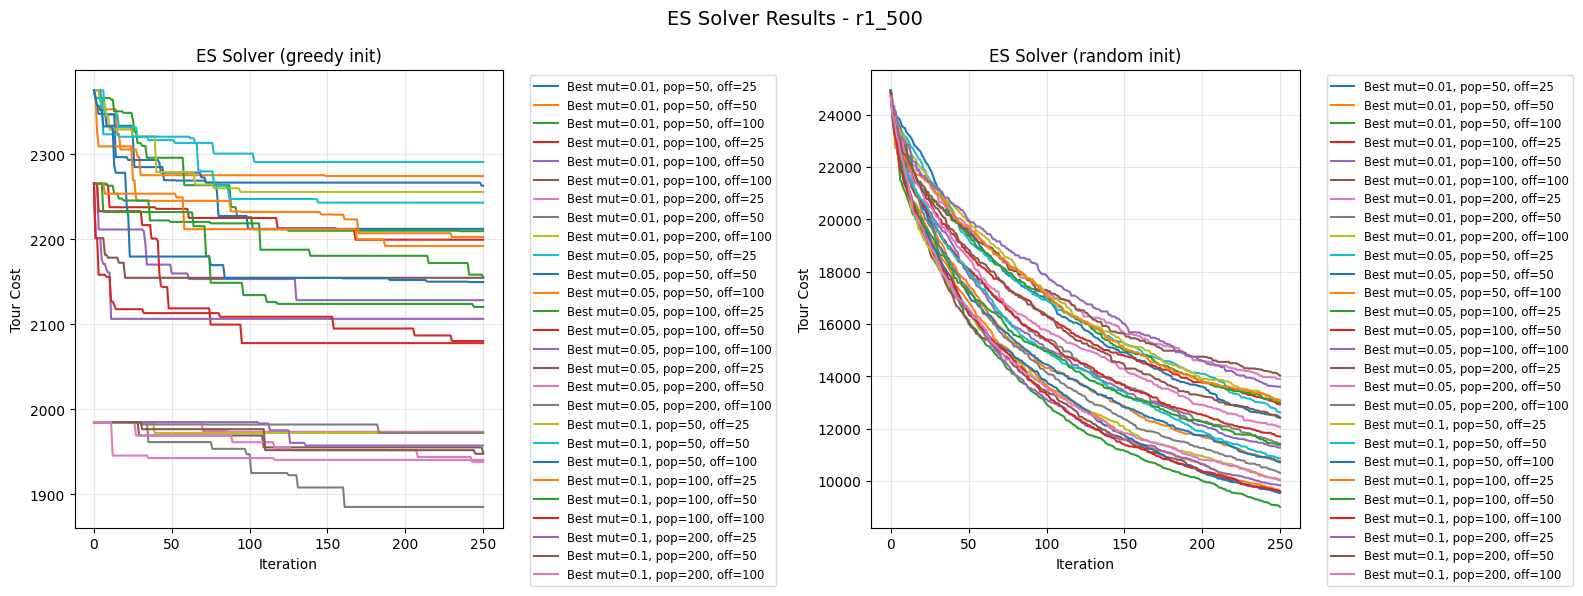

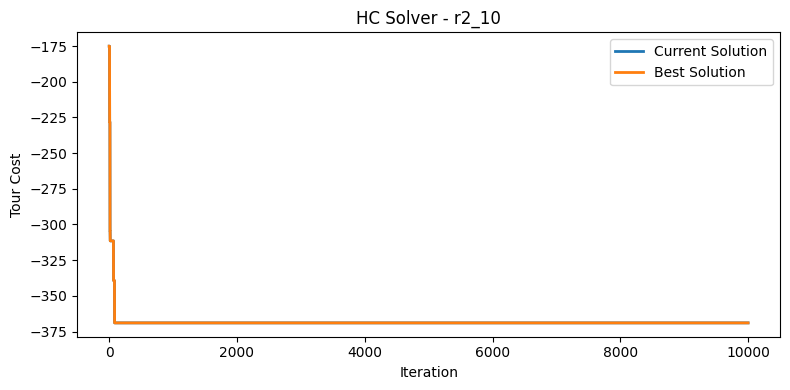

Best ES Fitness: -411.7017155524985
Best ES Parameters: {'greedy_initial': False, 'population': 50, 'offspring': 25, 'mutation': 0.01}


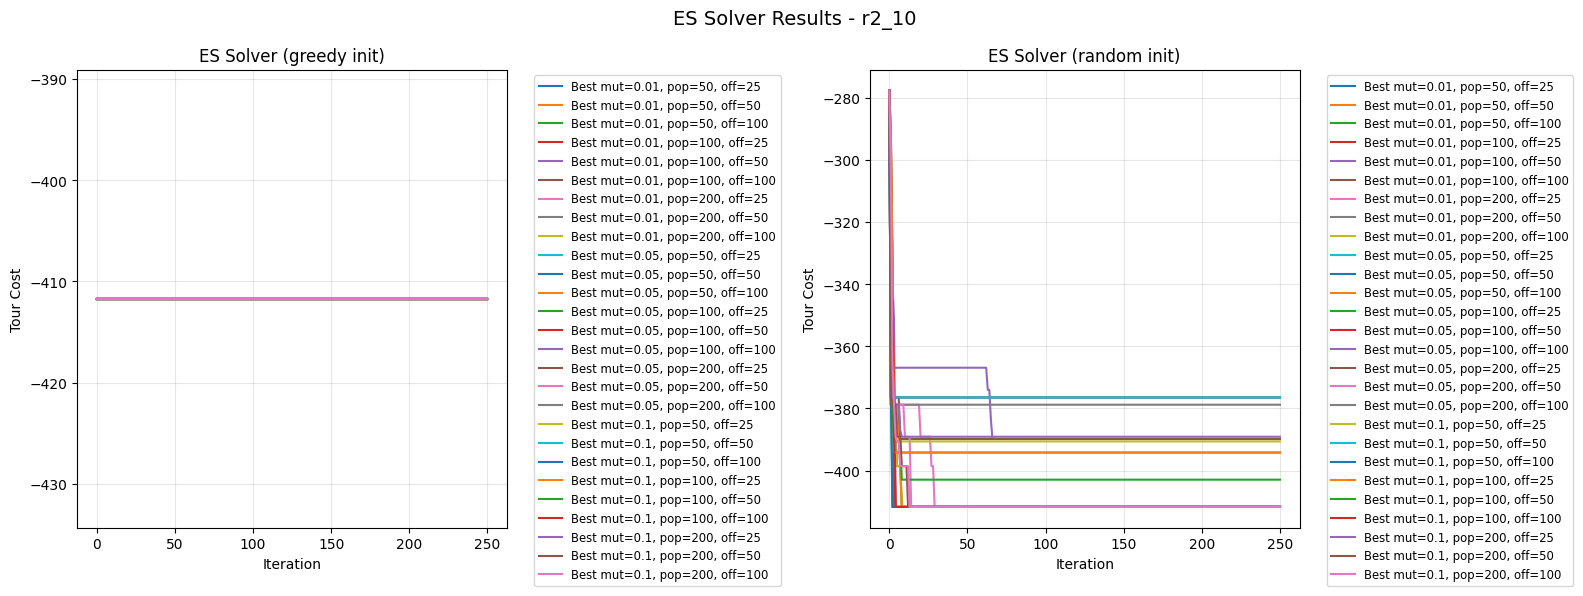

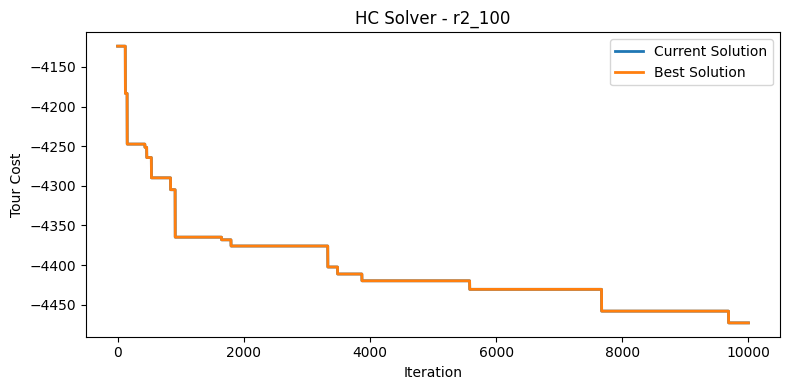

Best ES Fitness: -4708.369243845407
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 100, 'mutation': 0.05}


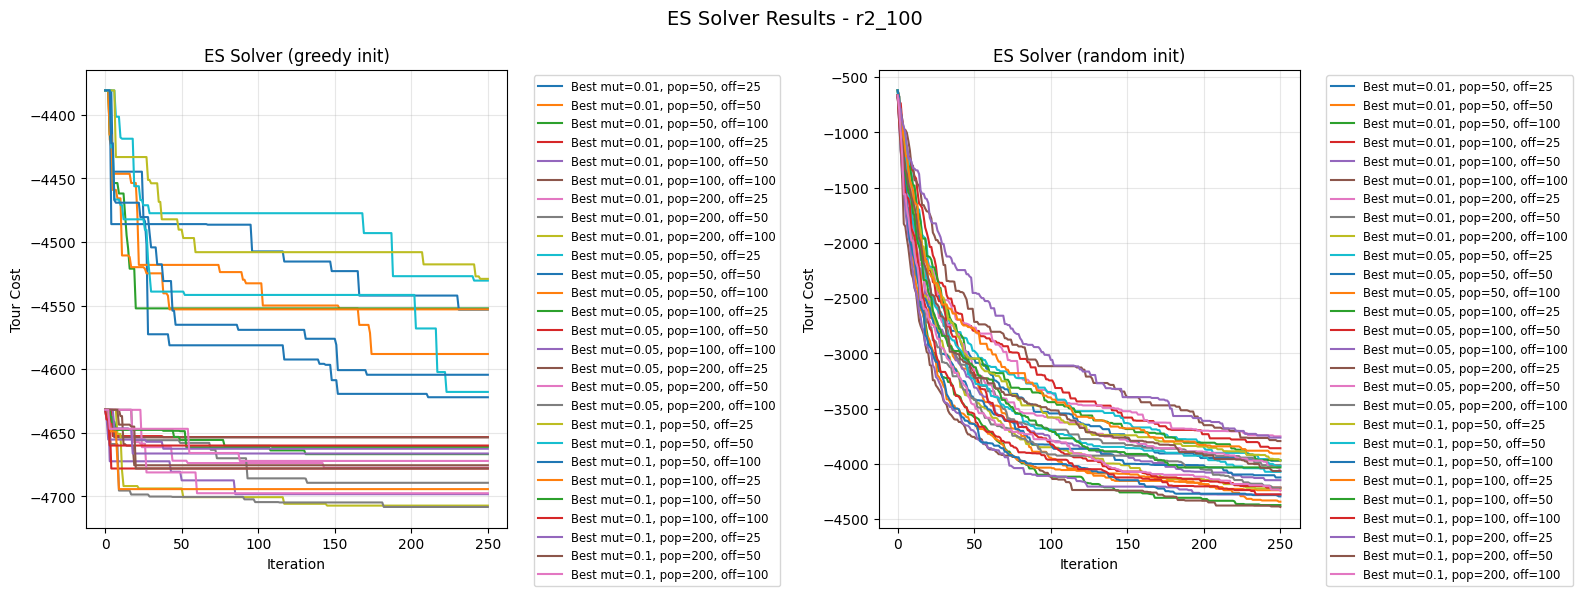

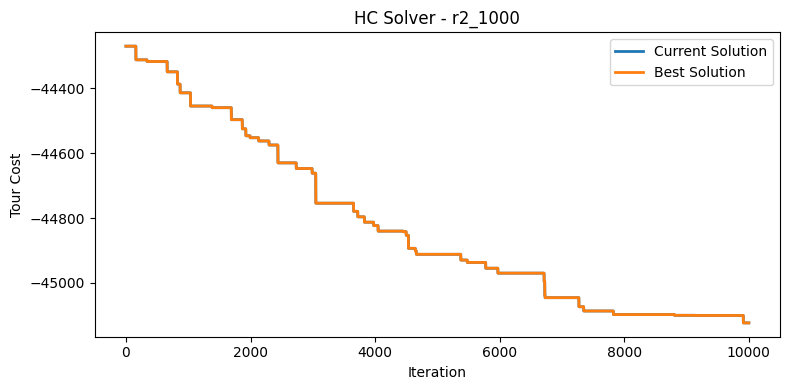

Best ES Fitness: -49295.83791741869
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 100, 'mutation': 0.1}


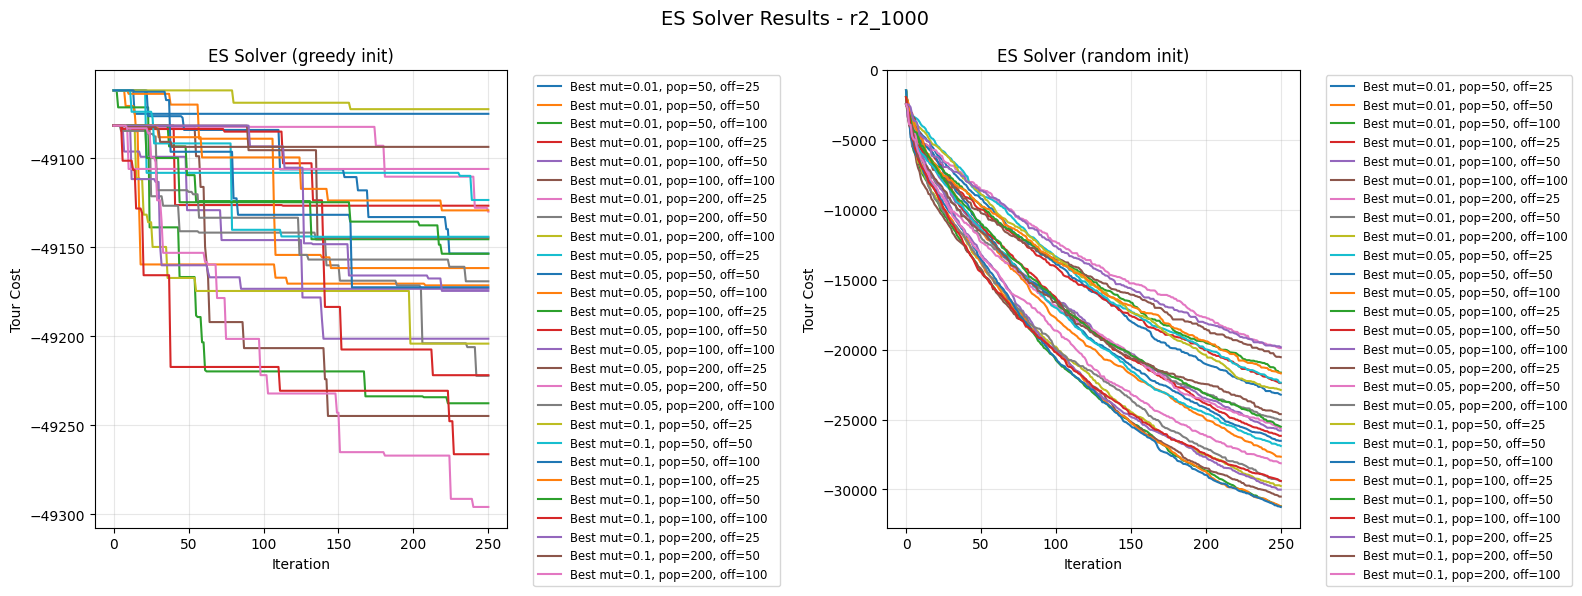

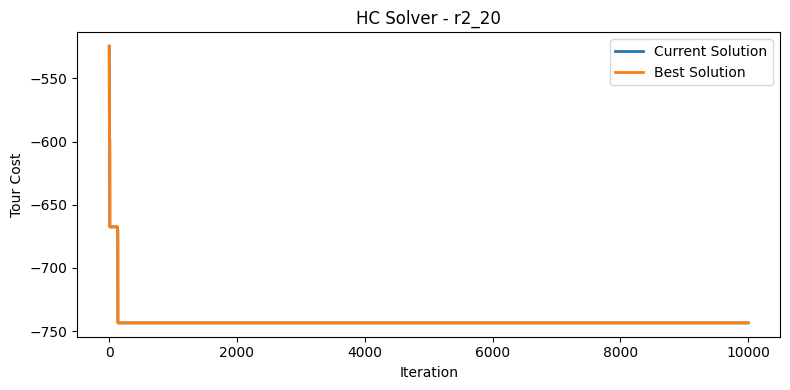

Best ES Fitness: -844.2659774812848
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 50, 'mutation': 0.05}


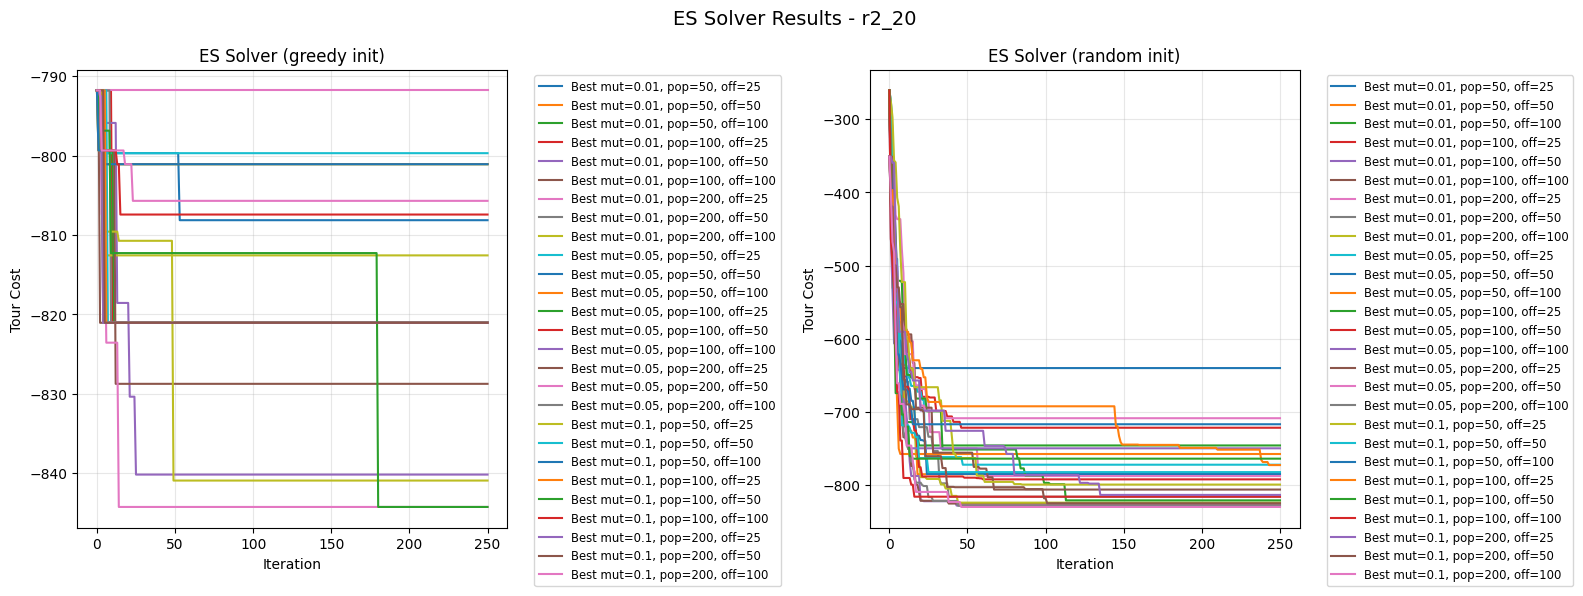

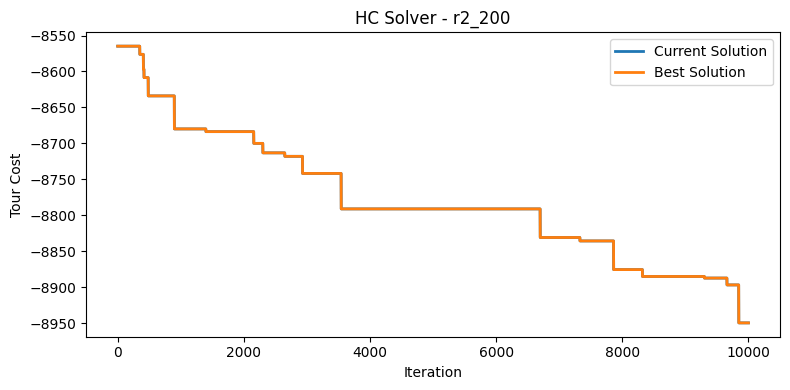

Best ES Fitness: -9561.662645153312
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 100, 'mutation': 0.01}


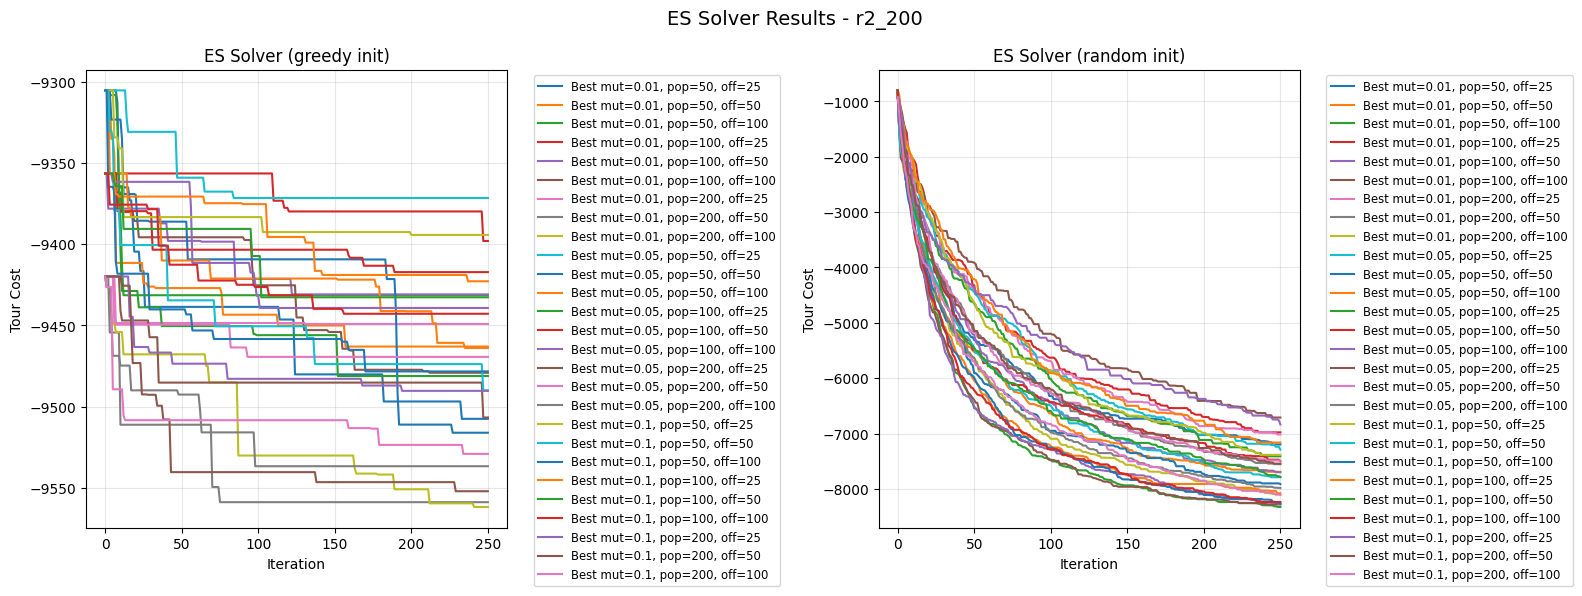

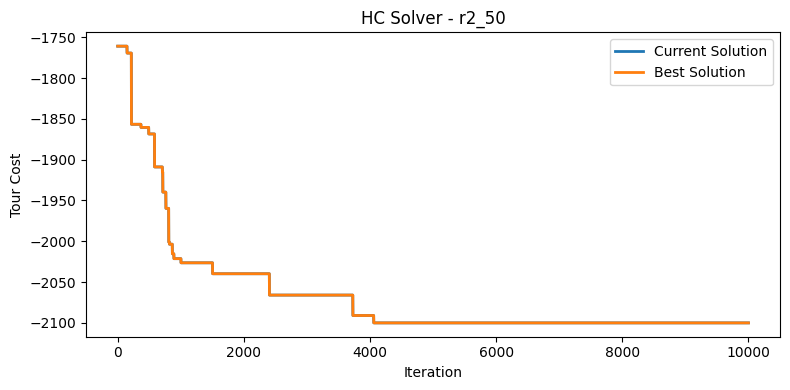

Best ES Fitness: -2274.489282358286
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 25, 'mutation': 0.01}


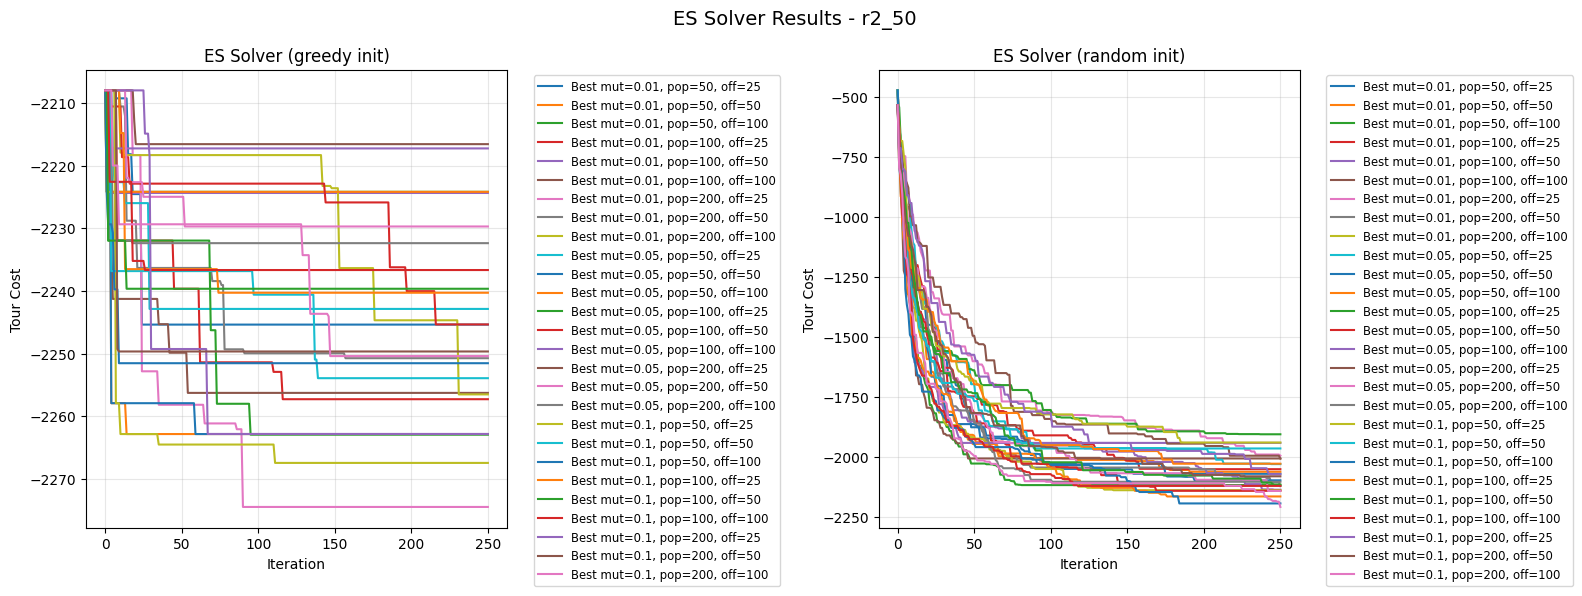

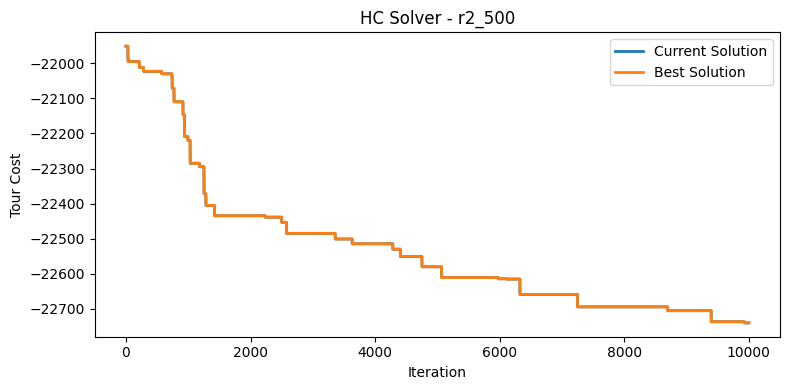

Best ES Fitness: -24518.59064685426
Best ES Parameters: {'greedy_initial': True, 'population': 200, 'offspring': 100, 'mutation': 0.05}


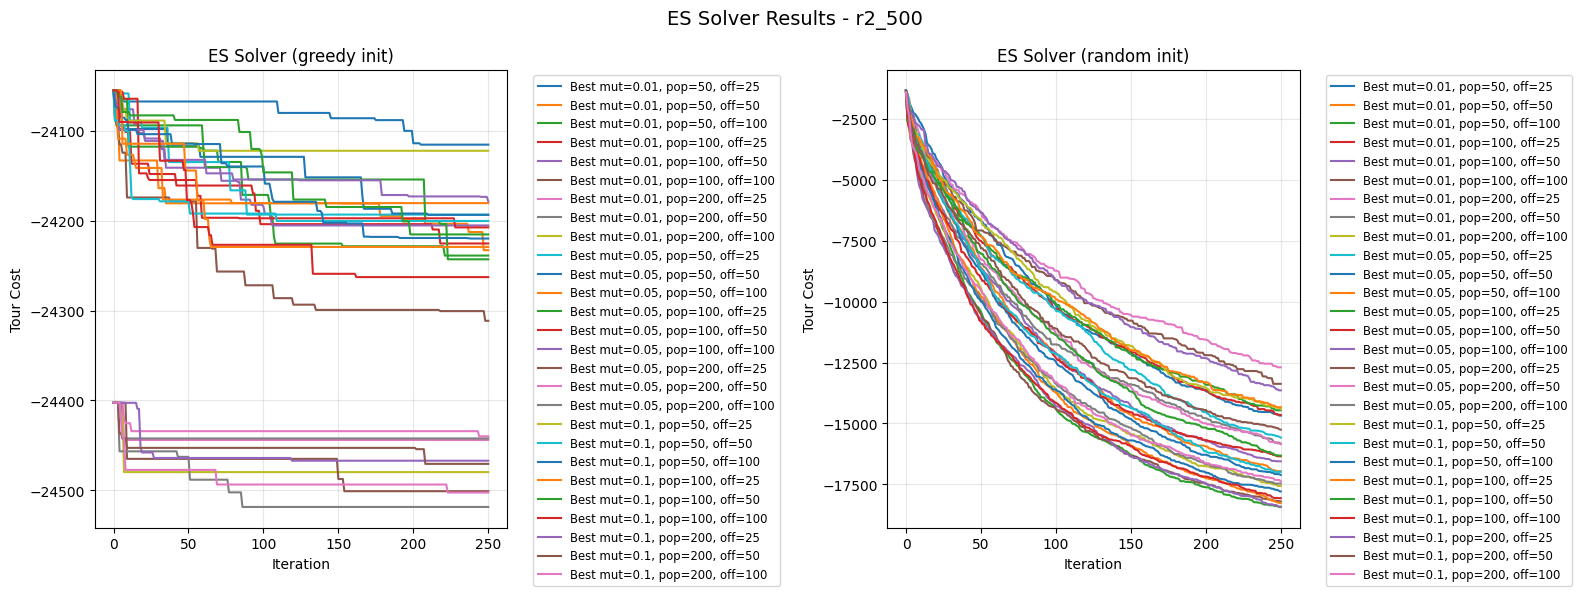

In [7]:
for name in problem_names:
    results = get_results('test_problems', f"problem_{name}")

    best_solution = min(
    results['es_results'],
    key=lambda sol: sol.best_fitness
    )

    # Plot HC separately
    plt.figure(figsize=(8, 4))
    plt.title(f'HC Solver - {name}')
    plt.plot(results['hc_results'].history, label='Current Solution', linewidth=2)
    plt.plot(results['hc_results'].best_history, label='Best Solution', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Tour Cost')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot ES (greedy and random) in subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'ES Solver Results - {name}', fontsize=14)
    
    # Greedy init subplot
    ax1.set_title('ES Solver (greedy init)')
    for es_result in filter(lambda result: result.params['greedy_initial'], results['es_results']):
        config = f"mut={es_result.params['mutation']}, pop={es_result.params['population']}, off={es_result.params['offspring']}"
        ax1.plot(es_result.best_history, label='Best ' + config, linewidth=1.5)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Tour Cost')
    ax1.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)

    # Random init subplot
    ax2.set_title('ES Solver (random init)')
    for es_result in filter(lambda result: not result.params['greedy_initial'], results['es_results']):
        config = f"mut={es_result.params['mutation']}, pop={es_result.params['population']}, off={es_result.params['offspring']}"
        ax2.plot(es_result.best_history, label='Best ' + config, linewidth=1.5)
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Tour Cost')
    ax2.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)

    print(f"Best ES Fitness: {best_solution.best_fitness}")
    # print(f"Best ES Tour: {best_solution.best_sequence}") # To avoid bloating the output
    print(f"Best ES Parameters: {best_solution.params}")

    plt.tight_layout()
    plt.show()


In [14]:
# Get best sequence for each problem name
with open('tsp_best_solutions.csv', 'w') as f:
    f.write('problem_name,best_fitness,best_sequence\n')
    for name in problem_names:
        results = get_results('test_problems', f"problem_{name}")

        best_ec_solution = min(
            results['es_results'],
            key=lambda sol: sol.best_fitness
        )

        best_sol = min([best_ec_solution, results['hc_results']], key=lambda sol: sol.best_fitness)

        f.write(f"{name},{best_sol.best_fitness},{best_sol.best_sequence}\n")

# Algorithm testing
If you want to test algorithm with your parameters, this is the place

ic| best_sol.fitness: 1854.3244228769377


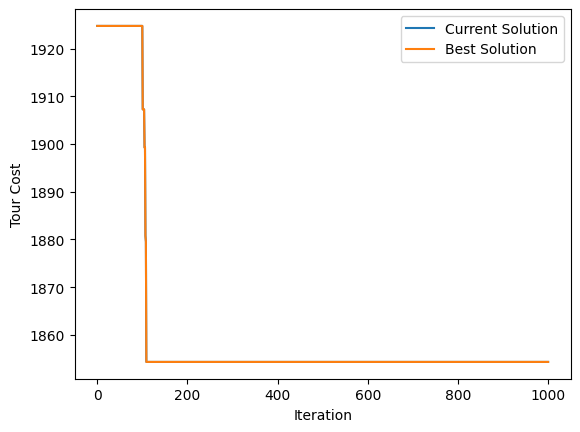

In [15]:
from es_solver import TSPESSolver
import numpy as np
from icecream import ic
import matplotlib.pyplot as plt

problem = np.load('test_problems/problem_r1_500.npy')
greedy=True
population=100
offspring=50
mutation_rate=0.1
MAX_ITER=1000

solver = TSPESSolver(problem, greedy_initial_solutions=greedy, 
                        population_size=population,
                        offspring_size=offspring,
                        mutation_rate=mutation_rate)

best_sol, best_history, history = solver.es_solve(max_iter=MAX_ITER)
ic(best_sol.fitness)

plt.plot(history, label='Current Solution')
plt.plot(best_history, label='Best Solution')
plt.xlabel('Iteration')
plt.ylabel('Tour Cost')
plt.legend()
plt.show()



# Results examination
To check for results provided please use this

In [ ]:
from test_solvers import get_results

name = 'r1_10'
results = get_results('test_problems', f"problem_{name}")

In [17]:
# Ec results examination
for es_result in results['es_results']:
    print(f"ES Parameters: {es_result.params}")
    print(f"Best ES Fitness: {es_result.best_fitness}")
    print(f"Best ES Tour: {es_result.best_sequence}")
    # also .history and .best_history are available
    print()

# HC results examination
hc_result = results['hc_results']
print(f"HC Best Fitness: {hc_result.best_fitness}")
print(f"HC Best Tour: {hc_result.best_sequence}")


ES Parameters: {'greedy_initial': True, 'population': 50, 'offspring': 25, 'mutation': 0.01}
Best ES Fitness: 2263.1879022936114
Best ES Tour: [82, 463, 371, 329, 439, 326, 223, 291, 103, 48, 109, 299, 317, 406, 198, 16, 50, 310, 429, 78, 117, 495, 321, 170, 454, 305, 70, 63, 446, 412, 216, 27, 489, 22, 5, 471, 173, 146, 245, 233, 37, 137, 195, 357, 440, 246, 355, 276, 362, 322, 292, 426, 18, 494, 460, 31, 331, 356, 388, 253, 95, 447, 153, 298, 7, 399, 42, 420, 164, 204, 186, 468, 14, 133, 168, 381, 327, 459, 478, 193, 418, 104, 304, 380, 128, 364, 487, 218, 313, 397, 385, 261, 254, 352, 383, 398, 338, 10, 229, 220, 179, 15, 263, 483, 359, 336, 106, 163, 325, 217, 197, 90, 192, 44, 134, 21, 354, 237, 148, 379, 324, 343, 490, 450, 488, 475, 183, 479, 308, 442, 113, 33, 417, 280, 270, 360, 267, 77, 219, 445, 407, 102, 311, 458, 401, 59, 187, 232, 428, 20, 93, 72, 181, 6, 309, 328, 390, 32, 61, 34, 461, 17, 155, 140, 202, 240, 11, 225, 470, 391, 196, 161, 427, 286, 423, 1, 64, 83, 62, 430